# Ashwin Ramesh

## Research question/interests

I would like to research the effects of stock splits on the NYSE between 2010 and 2016. Namely Apple and Citygroup stock. I would like to analyze how the trading volume was affected by the split and if there was a directional bias associated with the stock split (If it was a positive or negative bias).

In [2]:
import pandas as pd
import numpy as np
import plotly as go
import matplotlib.pylab as plt
import seaborn as sns 
import project_functions2 as p2

fundamentals_Df = pd.read_csv('../data/raw/fundamentals.csv')
pricesplit_Df = pd.read_csv('../data/raw/prices-split-adjusted.csv')
prices_Df = pd.read_csv('../data/raw/prices.csv')
securities_Df = pd.read_csv('../data/raw/securities.csv')

In [3]:
pricesplit_Df.shape

(851264, 7)

In [4]:
pricesplit_Df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


I noticed that the data is not ordered by date. This would make analysis difficult and hence it must be corrected as shown below. 

In [5]:
sorted_pricesplit=pricesplit_Df.sort_values(by = ["date"], ascending = True)
sorted_pricesplit.to_csv('sorted_pricesplit.csv', index =False)

In [6]:
sorted_pricesplit.nunique(axis=0)

date        1762
symbol       501
open       97522
close      98520
low        97470
high       97784
volume    171073
dtype: int64

In [7]:
sorted_pricesplit.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,851264.000000
mean,64.993618,65.011913,64.336541,65.639748,5415112.640027
std,75.203893,75.201216,74.459518,75.906861,12494681.433081
min,1.660000,1.590000,1.500000,1.810000,0.000000
25%,31.270000,31.292776,30.940001,31.620001,1221500.000000
50%,48.459999,48.480000,47.970001,48.959999,2476250.000000
75%,75.120003,75.139999,74.400002,75.849998,5222500.000000
max,1584.439941,1578.130005,1549.939941,1600.930054,859643400.000000


Text(0.5, 1.0, 'Growth of the NYSE 2010-2016')

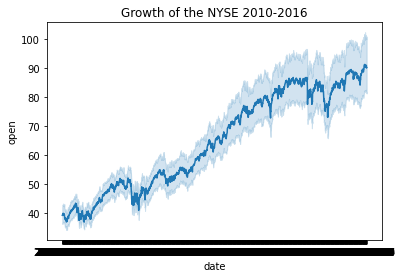

In [8]:
plot = sns.lineplot(x='date',y='open', data=sorted_pricesplit)
plot.set_title("Growth of the NYSE 2010-2016")

It is noticable through the above lineplot that for a 6 year interval between 2010 and 2016, there is considerable growth in the overall opening price of stocks in the NYSE. This could be due to an increased awareness and interest of retail investors in the market. It could also be a result of an increase in technological efficiencies which in turn improved the services offered in multiple industries. We must take into consideration that the market was coming out of a recession that took place in 2008. This shows us that despite economic downfall, the stock market has the capacity to bounce back to new highs.

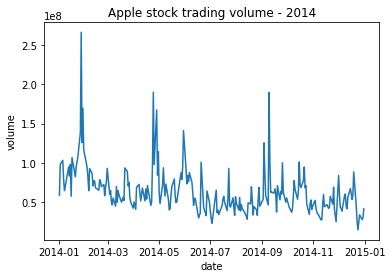

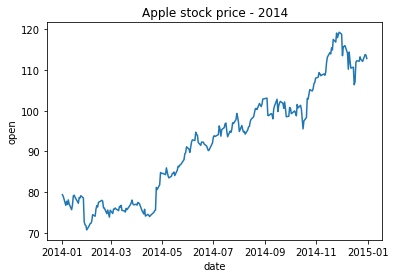

In [12]:
#interested_stocks= ["AAPL", "C"]
sorted_pricesplit['date'] = pd.to_datetime(sorted_pricesplit['date'], format='%Y-%m-%d')

#Apple 2014 stock split

filtered2014_df = sorted_pricesplit.loc[(sorted_pricesplit['date'] >= '2014-01-01')
                     & (sorted_pricesplit['date'] < '2015-01-01')]

apple_2014 = filtered2014_df.loc[filtered2014_df["symbol"]=="AAPL"]
plot1=sns.lineplot(x = "date", y = "volume", data =apple_2014)
plot1.set_title("Apple stock trading volume - 2014")
plt.show() #Shows volume variation based on the day

plot2=sns.lineplot(x = "date", y= "open", data= apple_2014);
plot2.set_title("Apple stock price - 2014")
plt.show() #Shows price variation based on the day

Apple went through a 7:1 basis stock split on June 9th 2014. It can be observed that in the month of June, there was a sharp increase in trading volume which would be expected considering the drop in share price. The share price however begins to rise as well. This could be because large capital investors tend to have greater sway on the market as opposed to the retail investor. The stock price could have also risen due to a new product release.

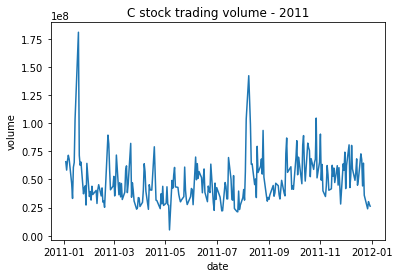

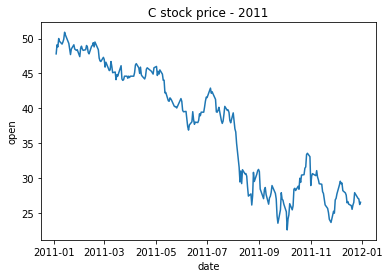

In [16]:
filtered2011_df = sorted_pricesplit.loc[(sorted_pricesplit['date'] >= '2011-01-01')
                     & (sorted_pricesplit['date'] < '2012-01-01')]

# Citygroup 2011 stock split

citygroup_2011 = filtered2011_df.loc[filtered2011_df["symbol"]=="C"]
plot1=sns.lineplot(x = "date", y = "volume", data =citygroup_2011)
plot1.set_title("C stock trading volume - 2011")
plt.show() #Shows volume variation based on the day

plot2=sns.lineplot(x = "date", y= "open", data= citygroup_2011);
plot2.set_title("C stock price - 2011")
plt.show() #Shows price variation based on the day


Citygroup is another interesting stock that I would like to analyize. Citygroup announced a 1 for 10 reverse stock split early in 2011 in hopes of reducing the number of outstanding shares and thereby increasing the share price. However, the weakening financial system system around the world and the drop in the rating of the dollar from AAA+ to AA severely affected the bank in the following months as seen in the graph above. The crash in the financial markets in 2011 severely affected the price of the stock after August 2011 as seen above.

## Method chaining

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def pre_processing(x):

    filtered_Df = (
    pd.read_csv(x)
    .sort_values(by = ["date"], ascending = True)
    .dropna(axis=0)
    )
    return filtered_Df

In [ ]:
pre_processing('../data/raw/prices-split-adjusted.csv')

## Module Testing

In [ ]:
df = p2.pre_processing('../data/raw/prices.csv')
df

# Task 4

Please check the group_analysis.ipynb file